## V6

In [1]:
import os, sys
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# path 설정
sys.path.append(os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath("")))))
print(sys.path[-1])

d:\base\boostcamp\apart\level2-competitiveds-recsys-06


In [2]:
raw_path: str = "../../../data/raw"
processed_path: str = "../../../data/processed"
submission_path: str = "../../../data/submission"

In [3]:
v6: pd.DataFrame = pd.read_csv(os.path.join(processed_path,"v6_public_rental.csv"))

### Arima_Deposit_Index 추가

In [4]:
pd.set_option('display.max_columns', None)
v6[v6['apt_idx']==15571]

,index,area_m2,contract_year_month,contract_day,contract_type,floor,built_year,latitude,longitude,age,deposit,_type,apt_idx,area,area_price,area_m2_price,grid_id,nearest_subway_distance,nearest_subway_idx,num_subway_within_1km,category_interchange_within_1km,num_subway_within_500m,category_interchange_within_500m,nearest_elementary_school_distance,nearest_elementary_school_within_1km,has_elementary_school_within_1km,nearest_middle_school_distance,nearest_middle_school_within_1km,has_middle_school_within_1km,nearest_high_school_distance,nearest_high_school_within_1km,has_high_school_within_1km,nearest_park_distance,nearest_park_within_500.0m,has_park_within_500.0m,apt_deposit_rank,apt_area_deposit_rank,original_index,recent_deposit,interest_rate,diff_interest_rate,arima_deposit_index,public_rental
1260709,1260709,273.96,202111,12,0,14,2020,37.525956,127.054237,1,930000.0,train,15571,83.0,11204.819277,3394.656154,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1260709,NaN,1.55,0.26,142.568382,0.0
1406833,1406833,273.96,202210,13,0,18,2020,37.525956,127.054237,2,1100000.0,train,15571,83.0,13253.012048,4015.184698,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1406833,930000.0,3.98,0.58,130.098114,0.0
1539384,1539384,273.96,202304,20,1,2,2020,37.525956,127.054237,3,570000.0,train,15571,83.0,6867.469880,2080.595707,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1539384,1100000.0,3.44,-0.12,122.690711,1.0
1542638,1542638,273.96,202307,7,2,14,2020,37.525956,127.054237,3,1000000.0,train,15571,83.0,12048.192771,3650.167908,91115.932685,737,367,1,1,0,0,841.746119,2,1,883.965127,1,1,947.066814,2,1,477.939202,1,1,2,2,1542638,570000.0,3.69,-0.01,128.762531,0.0


In [9]:
# df['date'] = pd.to_datetime(df['contract_year_month'].astype(str) + df['contract_day'].astype(str).str.zfill(2), format='%Y%m%d')
# df['year'] = df['date'].dt.year
# df['month'] = df['date'].dt.month
# df['day'] = df['date'].dt.day
# df['month_sin'] = np.sin(2 * np.pi * df['date'].dt.month / 12)
# df['month_cos'] = np.cos(2 * np.pi * df['date'].dt.month / 12)
# df['day_sin'] = np.sin(2 * np.pi * df['date'].dt.day / 30)
# df['day_cos'] = np.cos(2 * np.pi * df['date'].dt.day / 30)

### 컬럼 정리

In [5]:
v6_contract_type = pd.get_dummies(v6, columns=['contract_type'], prefix='contract')
v6_contract_type.columns

Index(['index', 'area_m2', 'contract_year_month', 'contract_day', 'floor',
       'built_year', 'latitude', 'longitude', 'age', 'deposit', '_type',
       'apt_idx', 'area', 'area_price', 'area_m2_price', 'grid_id',
       'nearest_subway_distance', 'nearest_subway_idx',
       'num_subway_within_1km', 'category_interchange_within_1km',
       'num_subway_within_500m', 'category_interchange_within_500m',
       'nearest_elementary_school_distance',
       'nearest_elementary_school_within_1km',
       'has_elementary_school_within_1km', 'nearest_middle_school_distance',
       'nearest_middle_school_within_1km', 'has_middle_school_within_1km',
       'nearest_high_school_distance', 'nearest_high_school_within_1km',
       'has_high_school_within_1km', 'nearest_park_distance',
       'nearest_park_within_500.0m', 'has_park_within_500.0m',
       'apt_deposit_rank', 'apt_area_deposit_rank', 'original_index',
       'recent_deposit', 'interest_rate', 'diff_interest_rate',
       'arima_de

In [6]:
# Remove rows where public_rental is 1
v6_filtered = v6[v6['public_rental'] != 1]

In [7]:
# columns_to_drop = ['contract_2', 'area_m2_price', 'area_price', 'date', 'contract_ymd', 'original_index', 'interest_rate', 'diff_interest_rate', 'area']
# df = v4_arima_contract_type.drop(columns=columns_to_drop, errors='ignore')

columns = ['index', 'area_m2', 'floor', 'age', 'latitude', 'longitude', 'apt_idx','nearest_subway_distance','num_subway_within_1km', 'category_interchange_within_1km',
           'deposit', '_type', 'grid_id', 'apt_deposit_rank', 'apt_area_deposit_rank', 'recent_deposit', 'contract_year_month',
           'arima_deposit_index', 'contract_0', 'contract_1']

df = v6_filtered.filter(items=columns)

df['recent_deposit'] = df['recent_deposit'].fillna(39000)
temp_train_df = df[df["_type"]=='train']
test_df = df[df["_type"]=='test']

In [10]:
df[df['_type']=='train']

,index,area_m2,floor,age,latitude,longitude,apt_idx,nearest_subway_distance,num_subway_within_1km,category_interchange_within_1km,deposit,_type,grid_id,apt_deposit_rank,apt_area_deposit_rank,recent_deposit,contract_year_month,arima_deposit_index
3,3,59.3400,1,33,36.964647,127.055847,1,3897,0,0,5000.0,train,18375.213675,18366,58901,39000.0,201907,103.855832
4,4,59.8100,6,24,36.972390,127.084514,2,2039,0,0,1800.0,train,12627.879781,18369,58863,39000.0,201904,100.000000
5,5,84.9342,13,3,36.965423,127.048779,3,4284,0,0,20000.0,train,18375.213675,11986,43564,39000.0,201904,100.000000
7,7,84.9342,3,3,36.965423,127.048779,3,4284,0,0,20000.0,train,18375.213675,11986,43564,20000.0,201905,102.251637
8,8,84.9610,3,3,36.965423,127.048779,3,4284,0,0,20500.0,train,18375.213675,11986,43736,39000.0,201905,102.251637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1801222,1801222,115.5101,12,13,37.528394,126.659398,17869,1483,0,0,37000.0,train,33310.656662,6088,25360,31500.0,202311,140.872160
1801224,1801224,101.9088,6,13,37.528394,126.659398,17869,1483,0,0,38000.0,train,33310.656662,6088,25333,35000.0,202311,140.872160
1801225,1801225,114.7900,19,13,37.528394,126.659398,17869,1483,0,0,37000.0,train,33310.656662,6088,27351,29000.0,202312,142.135947
1801226,1801226,101.9088,15,13,37.528394,126.659398,17869,1483,0,0,34400.0,train,33310.656662,6088,25333,38000.0,202312,142.135947


In [8]:
# from sklearn.preprocessing import StandardScaler

# # 로그 변환할 컬럼들
# columns_to_log_transform = [col for col in df.columns if col not in ['category_interchange_within_1km', 'contract_0', 'contract_1', 'deposit', '_type']]

# # 0이하값 0으로 변환
# df['floor'] = df['floor'].clip(lower=0)
# df['age'] = df['age'].clip(lower=0)

# # 로그 변환
# for col in columns_to_log_transform:
#     df[col] = np.log1p(df[col])



# df

,index,area_m2,floor,age,latitude,longitude,apt_idx,nearest_subway_distance,num_subway_within_1km,category_interchange_within_1km,deposit,_type,grid_id,apt_deposit_rank,apt_area_deposit_rank,recent_deposit,contract_year_month,arima_deposit_index,contract_0,contract_1
0,0.000000,4.454325,2.302585,0.000000,3.639014,4.852383,0.000000,6.576470,0.693147,1,17000.0,train,10.149677,8.946896,10.285377,10.571343,12.215562,4.636478,False,False
1,0.693147,4.454325,3.044522,0.693147,3.639014,4.852383,0.000000,6.576470,0.693147,1,23000.0,train,10.149677,8.946896,10.285377,9.741027,12.216043,4.668953,False,False
2,1.098612,4.454325,2.197225,0.693147,3.639014,4.852383,0.000000,6.576470,0.693147,1,23000.0,train,10.149677,8.946896,10.285377,10.043293,12.216043,4.668953,False,False
3,1.386294,4.099995,0.693147,3.526361,3.636655,4.852466,0.693147,8.268219,0.000000,0,5000.0,train,9.818812,9.818311,10.983630,10.571343,12.215567,4.652586,False,False
4,1.609438,4.107754,1.945910,3.218876,3.636859,4.852690,1.098612,7.620705,0.000000,0,1800.0,train,9.443742,9.818474,10.982985,10.571343,12.215553,4.615121,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1951395,11.919510,4.757978,2.890372,2.708050,3.651395,4.849366,9.790879,7.302496,0.000000,0,NaN,test,10.413663,8.714239,10.140968,10.518700,12.218016,4.963492,True,False
1951396,11.919517,4.968937,1.609438,2.708050,3.651395,4.849366,9.790879,7.302496,0.000000,0,NaN,test,10.413663,8.714239,9.793226,10.668979,12.218021,4.964911,True,False
1951397,11.919523,4.968937,2.639057,2.708050,3.651395,4.849366,9.790879,7.302496,0.000000,0,NaN,test,10.413663,8.714239,9.793226,10.668979,12.218021,4.964911,False,True
1951398,11.919530,4.752974,1.098612,2.708050,3.651395,4.849366,9.790879,7.302496,0.000000,0,NaN,test,10.413663,8.714239,10.091170,10.389026,12.218021,4.964911,False,True


In [9]:
# # Standard Scaler 적용
# scaler = StandardScaler()

# # train 데이터에 fit_transform
# train_data = df[df['_type'] == 'train']
# df.loc[df['_type'] == 'train', columns_to_log_transform] = scaler.fit_transform(train_data[columns_to_log_transform])

# # test 데이터에 transform
# test_data = df[df['_type'] == 'test']
# df.loc[df['_type'] == 'test', columns_to_log_transform] = scaler.transform(test_data[columns_to_log_transform])

# df.head()

,index,area_m2,floor,age,latitude,longitude,apt_idx,nearest_subway_distance,num_subway_within_1km,category_interchange_within_1km,deposit,_type,grid_id,apt_deposit_rank,apt_area_deposit_rank,recent_deposit,contract_year_month,arima_deposit_index,contract_0,contract_1
0,-13.404415,0.505180,0.161971,-2.703789,-2.611122,0.464754,-8.090443,-0.163594,0.101398,1,17000.0,train,-0.699665,0.304081,0.312334,0.324738,-1.679408,-2.271099,False,False
1,-12.711246,0.505180,1.246423,-1.976285,-2.611122,0.464754,-8.090443,-0.163594,0.101398,1,23000.0,train,-0.699665,0.304081,0.312334,-1.078812,-0.961800,-1.900000,False,False
2,-12.305768,0.505180,0.007970,-1.976285,-2.611122,0.464754,-8.090443,-0.163594,0.101398,1,23000.0,train,-0.699665,0.304081,0.312334,-0.567868,-0.961800,-1.900000,False,False
3,-12.018076,-0.493075,-2.190464,0.997359,-3.168942,0.527197,-7.436703,1.618782,-1.156295,0,5000.0,train,-1.461192,1.259215,1.160771,0.324738,-1.672009,-2.087027,False,False
4,-11.794926,-0.471215,-0.359363,0.674633,-3.120722,0.695555,-7.054289,0.936581,-1.156295,0,1800.0,train,-2.324466,1.259394,1.159986,0.324738,-1.694208,-2.515165,False,False


In [23]:
# temp_train_df = df[df["_type"]=='train']
# test_df = df[df["_type"]=='test']

In [18]:
# temp_train_df['log_deposit'] = np.log(temp_train_df['deposit'])

C:\Users\shgkd\AppData\Local\Temp\ipykernel_17528\2151955188.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_train_df['log_deposit'] = np.log(temp_train_df['deposit'])


## K-Fold CV(k=5) 적용 LightGBM

In [11]:
import lightgbm as lgb
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 학습에 사용할 특징 열
feature_columns = [col for col in temp_train_df.columns if col not in ['deposit', '_type', 'index']]

# 학습 데이터 준비
X = temp_train_df[feature_columns]
y = temp_train_df['deposit']

# 결측치 대체
# X['recent_deposit'] = X['recent_deposit'].fillna(39000)

# LightGBM 파라미터 설정
params = {
    'objective': 'regression',
    'metric': 'mae',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'seed': 42,
}

# 콜백 함수 정의
def print_evaluation(period=10):
    def callback(env):
        if (env.iteration + 1) % period == 0:
            train_mae = env.evaluation_result_list[0][2]
            val_mae = env.evaluation_result_list[1][2]
            print(f"[{env.iteration + 1}] Train MAE: {train_mae:.4f}, Val MAE: {val_mae:.4f}")
    return callback

# 5-fold 교차 검증 설정
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# 각 폴드의 예측 결과를 저장할 리스트
oof_predictions = np.zeros(len(X))
test_predictions = np.zeros(len(test_df))

# 교차 검증 수행
for fold, (train_idx, val_idx) in enumerate(kf.split(X), 1):
    print(f"\nFold {fold}")
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    dtrain = lgb.Dataset(X_train, label=y_train)
    dval = lgb.Dataset(X_val, label=y_val, reference=dtrain)
    
    model = lgb.train(
        params, 
        dtrain, 
        num_boost_round=1000, 
        valid_sets=[dtrain, dval], 
        callbacks=[print_evaluation(period=100)]
    )
    
    # 검증 세트에 대한 예측
    oof_predictions[val_idx] = model.predict(X_val)
    
    # 테스트 세트에 대한 예측
    test_predictions += model.predict(test_df[feature_columns]) / n_folds

# 전체 검증 세트에 대한 MAE 계산
oof_mae = mean_absolute_error(y, oof_predictions)
print(f"\nOverall OOF MAE: {oof_mae:.4f}")

# 테스트 세트에 대한 최종 예측 결과
y_pred = test_predictions

print("\nTraining completed.")


Fold 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039881 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2518
[LightGBM] [Info] Number of data points in the train set: 1306724, number of used features: 15
[LightGBM] [Info] Start training from score 39465.583556
[100] Train MAE: 4486.3244, Val MAE: 4504.2693
[200] Train MAE: 4395.6052, Val MAE: 4422.5197
[300] Train MAE: 4356.0840, Val MAE: 4390.4705
[400] Train MAE: 4327.0953, Val MAE: 4368.0429
[500] Train MAE: 4302.9487, Val MAE: 4350.8835
[600] Train MAE: 4285.4449, Val MAE: 4339.7946
[700] Train MAE: 4271.0434, Val MAE: 4332.1002
[800] Train MAE: 4254.8587, Val MAE: 4321.2162
[900] Train MAE: 4239.9088, Val MAE: 4310.9617
[1000] Train MAE: 4227.4121, Val MAE: 4303.1221

Fold 2
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And

### Feature Importance

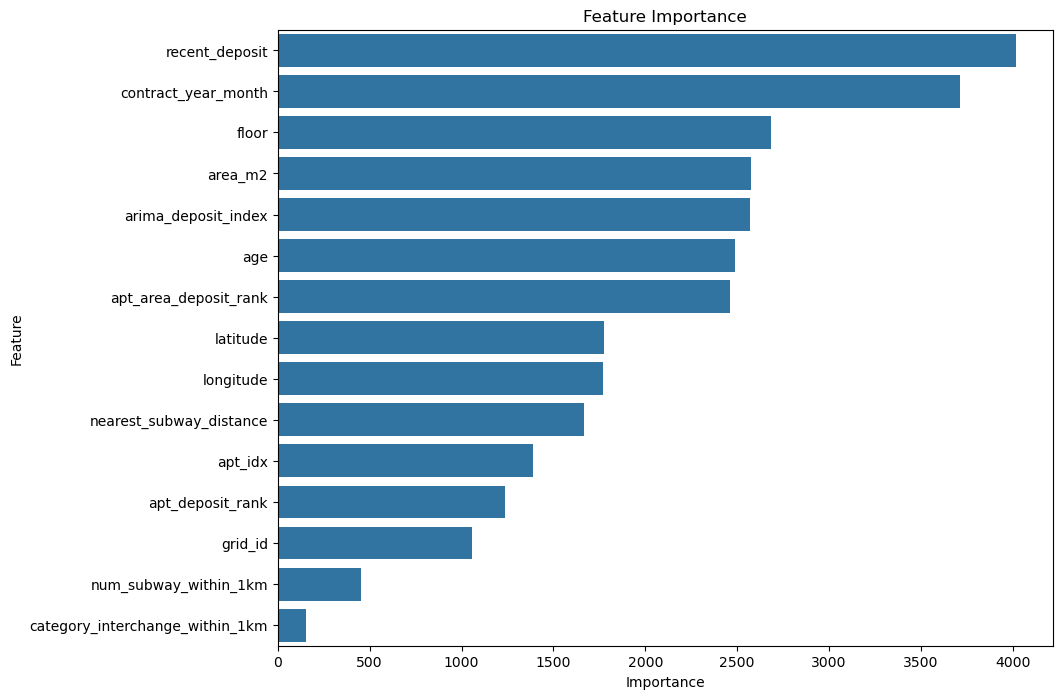

In [12]:
# LightGBM 모델의 피처 중요도 추출
feature_importance = model.feature_importance()

# 피처 중요도를 DataFrame으로 변환
importance_df = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': feature_importance
})

# 중요도 순으로 정렬
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 시각화
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.show()

In [13]:
y_pred

array([22376.03188913,  7054.17885058,  5259.02770473, ...,
       44833.42308016, 37674.58224348, 37078.69787531])

In [14]:
# Create a DataFrame from y_pred with the same index as X_test
y_pred_df = pd.DataFrame(y_pred, index=range(len(y_pred)), columns=['deposit'])

# Display the DataFrame
y_pred_df.index.name = 'index'
y_pred_df

,deposit
index,
0,22376.031889
1,7054.178851
2,5259.027705
3,5211.550283
4,5338.442271
...,...
150167,37237.397703
150168,44302.502551
150169,44833.423080


In [15]:
y_pred_df['deposit'].mean()

np.float64(39524.28319851764)

In [16]:
submission_path: str = "../../../data/submission"
y_pred_df.to_csv(os.path.join(submission_path, "V6_lightGBM_Kfold5.csv"), index=True)